In [23]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True)

In [50]:
x, he, L, Q = sp.symbols('x, h^{(e)}, L, Q')
h, T_inf = sp.symbols('h, T_{\infty}')
k1e1, k2e1, k3e1, k1e2, k2e2, k3e2 = sp.symbols('k1e1, k2e1, k3e1, k1e2, k2e2, k3e2')
T1, T2, T3, T4, T5= sp.symbols('T1, T2, T3, T4, T5')

In [51]:
T = sp.Matrix([T1,T2,T3,T4,T5])
T

⎡T₁⎤
⎢  ⎥
⎢T₂⎥
⎢  ⎥
⎢T₃⎥
⎢  ⎥
⎢T₄⎥
⎢  ⎥
⎣T₅⎦

In [52]:
# Funciones de forma que se utilizarán son funciones de forma para elementos lineales
N_1 = (1- 3*x/he + 2*(x/he)**2)
N_2 = (4*x/he - 4*(x/he)**2)
N_3 = (-1*x/he + 2*(x/he)**2)

In [53]:
dN_1 = sp.diff(N_1, x)
dN_2 = sp.diff(N_2, x)
dN_3 = sp.diff(N_3, x)

In [54]:
N = sp.Matrix([N_1, N_2, N_3])
N

⎡                     2  ⎤
⎢      3⋅x         2⋅x   ⎥
⎢1 - ──────── + ─────────⎥
⎢    h__{(e)}           2⎥
⎢               h__{(e)} ⎥
⎢                        ⎥
⎢                   2    ⎥
⎢    4⋅x         4⋅x     ⎥
⎢  ──────── - ─────────  ⎥
⎢  h__{(e)}           2  ⎥
⎢             h__{(e)}   ⎥
⎢                        ⎥
⎢                    2   ⎥
⎢      x          2⋅x    ⎥
⎢ - ──────── + ───────── ⎥
⎢   h__{(e)}           2 ⎥
⎣              h__{(e)}  ⎦

In [55]:
dN = sp.Matrix([dN_1, dN_2, dN_3])
dN


⎡     3          4⋅x   ⎤
⎢- ──────── + ─────────⎥
⎢  h__{(e)}           2⎥
⎢             h__{(e)} ⎥
⎢                      ⎥
⎢    4          8⋅x    ⎥
⎢ ──────── - ───────── ⎥
⎢ h__{(e)}           2 ⎥
⎢            h__{(e)}  ⎥
⎢                      ⎥
⎢     1          4⋅x   ⎥
⎢- ──────── + ─────────⎥
⎢  h__{(e)}           2⎥
⎣             h__{(e)} ⎦

In [56]:
N.T

⎡                     2                     2                       2  ⎤
⎢      3⋅x         2⋅x       4⋅x         4⋅x          x          2⋅x   ⎥
⎢1 - ──────── + ─────────  ──────── - ─────────  - ──────── + ─────────⎥
⎢    h__{(e)}           2  h__{(e)}           2    h__{(e)}           2⎥
⎣               h__{(e)}              h__{(e)}                h__{(e)} ⎦

In [57]:
sp.Matrix([k1e1, k2e1, k3e1])

⎡k1e1⎤
⎢    ⎥
⎢k2e1⎥
⎢    ⎥
⎣k3e1⎦

#### Elemento 1

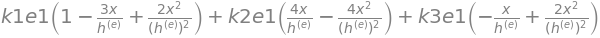

In [58]:
((N.T)*sp.Matrix([k1e1, k2e1, k3e1]))[0]

In [59]:
dN*dN.T

⎡                                    2                                        
⎢            ⎛     3          4⋅x   ⎞               ⎛     3          4⋅x   ⎞ ⎛
⎢            ⎜- ──────── + ─────────⎟               ⎜- ──────── + ─────────⎟⋅⎜
⎢            ⎜  h__{(e)}           2⎟               ⎜  h__{(e)}           2⎟ ⎜
⎢            ⎝             h__{(e)} ⎠               ⎝             h__{(e)} ⎠ ⎝
⎢                                                                             
⎢                                                                             
⎢ ⎛     3          4⋅x   ⎞ ⎛   4          8⋅x   ⎞               ⎛   4         
⎢ ⎜- ──────── + ─────────⎟⋅⎜──────── - ─────────⎟               ⎜──────── - ──
⎢ ⎜  h__{(e)}           2⎟ ⎜h__{(e)}           2⎟               ⎜h__{(e)}     
⎢ ⎝             h__{(e)} ⎠ ⎝           h__{(e)} ⎠               ⎝           h_
⎢                                                                             
⎢                                                   

In [60]:
((N.T)*sp.Matrix([k1e1, k2e1, k3e1]))[0]*dN*dN.T

⎡                                    2 ⎛     ⎛                     2  ⎞       
⎢            ⎛     3          4⋅x   ⎞  ⎜     ⎜      3⋅x         2⋅x   ⎟       
⎢            ⎜- ──────── + ─────────⎟ ⋅⎜k1e1⋅⎜1 - ──────── + ─────────⎟ + k2e1
⎢            ⎜  h__{(e)}           2⎟  ⎜     ⎜    h__{(e)}           2⎟       
⎢            ⎝             h__{(e)} ⎠  ⎝     ⎝               h__{(e)} ⎠       
⎢                                                                             
⎢                                                 ⎛     ⎛                     
⎢ ⎛     3          4⋅x   ⎞ ⎛   4          8⋅x   ⎞ ⎜     ⎜      3⋅x         2⋅x
⎢ ⎜- ──────── + ─────────⎟⋅⎜──────── - ─────────⎟⋅⎜k1e1⋅⎜1 - ──────── + ──────
⎢ ⎜  h__{(e)}           2⎟ ⎜h__{(e)}           2⎟ ⎜     ⎜    h__{(e)}         
⎢ ⎝             h__{(e)} ⎠ ⎝           h__{(e)} ⎠ ⎝     ⎝               h__{(e
⎢                                                                             
⎢                                                  ⎛

In [61]:
# elemento 1
he1 = 0.05 #m
# Como k(x) es lineal en los elementos en el nodo x1^e1 tendríamos 40,en el nodo x2^e1 tendríamos 45, x3^e1 tendríamos 50
# k1e1 = 40
# k2e1 = 45
# k3e1 = 50
K1 = sp.integrate(((N.T)*sp.Matrix([k1e1, k2e1, k3e1]))[0]*dN*dN.T, (x, 0, he1)).subs({he:he1, k1e1:40, k2e1:45, k3e1:50})
K1

⎡1966.66666666667   -2266.66666666667        300.0      ⎤
⎢                                                       ⎥
⎢-2266.66666666667       4800.0        -2533.33333333333⎥
⎢                                                       ⎥
⎣      300.0        -2533.33333333333  2233.33333333333 ⎦

In [62]:
# Coeficiente de convección h=100W/m^2°C
H1 = sp.Matrix([[h,0,0],
                [0,0,0],
                [0,0,0]]).subs({h:100})
H1

⎡100  0  0⎤
⎢         ⎥
⎢ 0   0  0⎥
⎢         ⎥
⎣ 0   0  0⎦

In [63]:
F1 = (h*T_inf*sp.Matrix([1,0,0])).subs({T_inf:400, h:100})
F1

⎡40000⎤
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎣  0  ⎦

In [64]:
MK1 = K1 + H1
MK1

⎡2066.66666666667   -2266.66666666667        300.0      ⎤
⎢                                                       ⎥
⎢-2266.66666666667       4800.0        -2533.33333333333⎥
⎢                                                       ⎥
⎣      300.0        -2533.33333333333  2233.33333333333 ⎦

#### Elemento 2

In [65]:
# elemento 2
#k1e2 = 50 # W/(m*K)
#k2e2 = 55 # W/(m*K)
#k3e2 = 60 # W/(m*K)
he2 = 0.05#m

In [66]:
K2 = sp.integrate(((N.T)*sp.Matrix([k1e2, k2e2, k3e2]))[0]*dN*dN.T, (x, 0, he2)).subs({he:he2, k1e2:50, k2e2:55,k3e2:60})
K2

⎡2433.33333333334       -2800.0       366.666666666666 ⎤
⎢                                                      ⎥
⎢    -2800.0       5866.66666666667   -3066.66666666666⎥
⎢                                                      ⎥
⎣366.666666666666  -3066.66666666666       2700.0      ⎦

In [67]:
H2 = sp.Matrix([[0,0,0],[0,0,0],[0,0,0]])
H2

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [68]:
F2 = sp.Matrix([0,0,0])
F2

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [69]:
MK2 = K2 + H2
MK2

⎡2433.33333333334       -2800.0       366.666666666666 ⎤
⎢                                                      ⎥
⎢    -2800.0       5866.66666666667   -3066.66666666666⎥
⎢                                                      ⎥
⎣366.666666666666  -3066.66666666666       2700.0      ⎦

## Ensamble de la matriz

In [97]:
#Ensamble de la matriz
MK = np.zeros((5,5)) #Matriz de 5x5 por que se consideran 5 nodos en total (3 por cada elemento pero se comparte el nodo inicial del elemento 1 con el nodo final del elemento 2)

i = 0
for j, MKK in enumerate([MK1, MK2]):
    
    MK[i,i] = MK[i,i] + np.array(MKK[0,0])
    MK[i+1,i] = MK[i+1,i] + np.array(MKK[1,0])
    MK[i+2,i] = MK[i+2,i] + np.array(MKK[2,0])
    
    MK[i,i+1] = MK[i,i+1] + np.array(MKK[0,1])
    MK[i,i+2] = MK[i,i+2] + np.array(MKK[0,2])
    
    MK[i+1,i+1] = MK[i+1,i+1] + np.array(MKK[1,1])
    MK[i+1,i+2] = MK[i+2,i+2] + np.array(MKK[1,2])
    MK[i+2,i+1] = MK[i+2,i+2] + np.array(MKK[1,2])
    
    MK[i+2,i+2] = MK[i+2,i+2] + np.array(MKK[2,2])
    
    i = j + 2

sp.Matrix(MK)

⎡2066.66666666667   -2266.66666666667        300.0               0.0          
⎢                                                                             
⎢-2266.66666666667       4800.0        -2533.33333333333         0.0          
⎢                                                                             
⎢      300.0        -2533.33333333333  4666.66666666667        -2800.0       3
⎢                                                                             
⎢       0.0                0.0              -2800.0       5866.66666666667   -
⎢                                                                             
⎣       0.0                0.0         366.666666666666   -3066.66666666666   

      0.0       ⎤
                ⎥
      0.0       ⎥
                ⎥
66.666666666666 ⎥
                ⎥
3066.66666666666⎥
                ⎥
    2700.0      ⎦

In [103]:
F = np.zeros((5))

for j, FF in enumerate([F1, F2]):
    i = j
    F[i] = F[i] + np.array(FF[0])
    F[i+1] = F[i+1] + np.array(FF[1])
F

array([40000.,     0.,     0.,     0.,     0.])

Imponemos la condición de Dirichlet en el extremo derecho $T3=39.18^oC$

In [104]:
MK[-1,:] = sp.Matrix([[0,0,0,0,1]])
F[-1] = 39.18

In [105]:
MK*T

array([[ 2.06665190e+05, -1.86623630e+05,  1.99584394e+04,
         0.00000000e+00,  0.00000000e+00],
       [-2.26665047e+05,  3.95202980e+05, -1.68537933e+05,
         0.00000000e+00,  0.00000000e+00],
       [ 2.99997857e+04, -2.08579351e+05,  3.10464613e+05,
        -1.46251048e+05,  1.43660000e+04],
       [ 0.00000000e+00,  0.00000000e+00, -1.86278768e+05,
         3.06430768e+05, -1.20152000e+05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.91800000e+01]])

In [106]:
F

array([4.000e+04, 0.000e+00, 0.000e+00, 0.000e+00, 3.918e+01])

In [107]:
T = np.linalg.solve(MK,F)
T

array([99.99928552, 82.3339542 , 66.52813143, 52.23251727, 39.18      ])

In [108]:
x_val = np.array([0,he1/2,he1/2,he2/2,he2/2])
x_val

array([0.   , 0.025, 0.025, 0.025, 0.025])

In [109]:
x_dominio = np.cumsum(x_val)
x_dominio

array([0.   , 0.025, 0.05 , 0.075, 0.1  ])

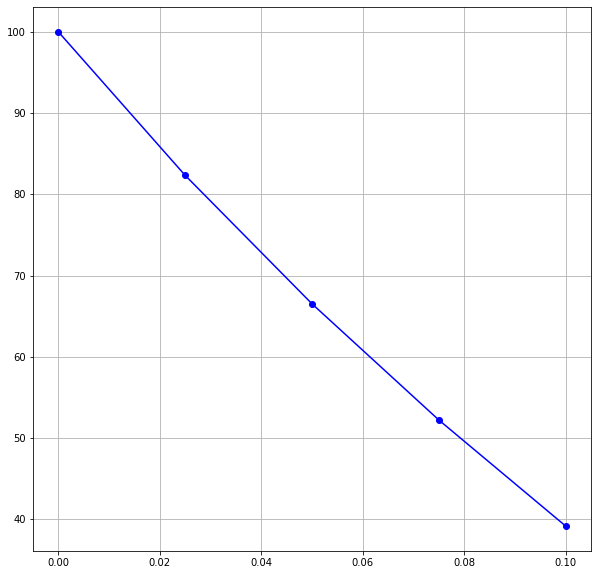

In [110]:
# Gráfica de la aproximación
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(x_dominio,T, 'bo-')